## Agent based model
Table of Contents
- [Import libraries python](#intro)
- [Define model](#probability)
- [Visualize model](#ab_test)


## Import libraries python
<a id='intro'></a>

the first step importing libraries and creat a model and agent,the model contains more function like init and step Each has its function

In [1]:
#import mesa library 
import mesa
import numpy as np
import matplotlib as plt


class SchellingAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1


class SchellingModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N):
        self.num_agents = N
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)

here we can show create the model and eagnt 

In [2]:
import mesa

#"""Represents a grid of Schelling agents."""
class SchellingAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def step(self):
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        print("Hi, I am agent " + str(self.unique_id) + ".")

#define SchellingModel 
class SchellingModel(mesa.Model):
    """A model with some number of agents."""
#define method for create agents
    def __init__(self, N):
        self.num_agents = N
        self.schedule = mesa.time.RandomActivation(self)
# Create agents
        for i in range(self.num_agents):
            a = SchellingAgent(i, self)
            self.schedule.add(a)

    def step(self):
        """Advance the model by one step."""
        self.schedule.step()

In [3]:
#check the model
empty_model = SchellingModel(10)
empty_model.step()

Hi, I am agent 4.
Hi, I am agent 0.
Hi, I am agent 8.
Hi, I am agent 5.
Hi, I am agent 9.
Hi, I am agent 1.
Hi, I am agent 6.
Hi, I am agent 3.
Hi, I am agent 2.
Hi, I am agent 7.


<a id='probability'></a>
## Define model


In [4]:
class SchellingAgent(mesa.Agent):
    """An agent with fixed initial wealth."""
#
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def step(self):
        if self.wealth == 0:
            return
        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.wealth += 1
        self.wealth -= 1

In [5]:
#you can change the numper and show plt
model = SchellingModel(1)
for i in range(28):
    model.step()

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

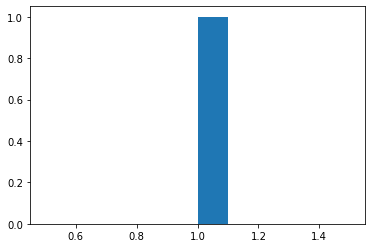

In [6]:
# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)

change the number and show the result changes 

define the SchellingAgent contain functions init ,move 

In [7]:
class SchellingAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_Schelling(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1

    def step(self):
        self.move()
        if self.wealth > 0:
            self.give_Schelling()


class SchellingModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = mesa.space.MultiGrid(width, height, True)
        self.schedule = mesa.time.RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = SchellingAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

(array([3.283e+03, 1.881e+03, 1.006e+03, 4.570e+02, 2.100e+02, 1.110e+02,
        3.300e+01, 1.200e+01, 6.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <BarContainer object of 11 artists>)

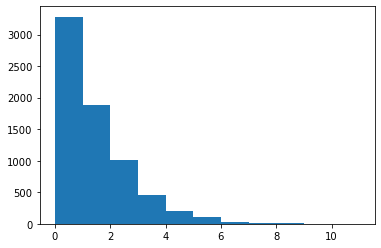

In [8]:
import matplotlib.pyplot as plt
all_wealth = []
# This runs the model 100 times, each model executing  steps.
for j in range(100):
    # Run the model
    model = SchellingModel(70, 10, 10)
    for i in range(17):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

plt.hist(all_wealth, bins=range(max(all_wealth) + 1))

In [9]:
class SchellingModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = mesa.space.MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = SchellingAgent(i, self)
            self.schedule.add(a)

            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

In [10]:
class SchellingAgent(mesa.Agent):
   #...
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

In [11]:
class SchellingAgent(mesa.Agent):
    #...
    def give_Schelling(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1

In [12]:
class SchellingAgent(mesa.Agent):
    # ...
    def step(self):
        self.move()
        if self.wealth > 0:
            self.give_money()

In [13]:
class SchellingAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 2

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 2
            self.wealth -= 2

    def step(self):
        self.move()
        if self.wealth > 1:
            self.give_money()


class SchellingModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = mesa.space.MultiGrid(width, height, True)
        self.schedule = mesa.time.RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = SchellingAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

In [14]:
#Check the model
model = SchellingModel(70, 10, 10)
for i in range(20):
    model.step()

<a id='ab_test'></a>
## visulize model


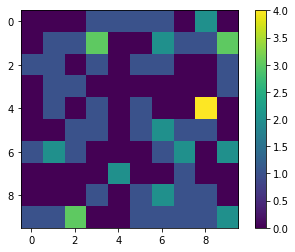

In [15]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation="nearest")
plt.colorbar()

# If running from a text editor or IDE, remember you'll need the following:
# plt.show()

Above and below we can see the photography of the model, we can also change the numbers and see the change in the perception

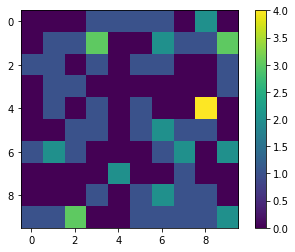

In [16]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation="nearest")
plt.colorbar()

# If running from a text editor or IDE, remember you'll need the following:
# plt.show()

In [17]:
#example for  anothe visualize 
def agent_portrayal(agent):
    portrayal = {
        "Shape": "circle",
        "Color": "red",
        "Filled": "true",
        "Layer": 0,
        "r": 0.5,
    }
    return portrayal

In [18]:
grid = mesa.visualization.CanvasGrid(agent_portrayal, 10, 10, 500, 500)


In [19]:
def agent_portrayal(agent):
    portrayal = {
        "Shape": "circle",
        "Filled": "true",
        "Layer": 0,
        "Color": "red",
        "r": 0.5,
    }
    return portrayal

the five using commit cells it was for more example 

In [20]:
#for more example1
# #run server and show  visualize
# #note change the port if used 
# #def agent_portrayal(agent):
#     portrayal = {
#         "Shape": "circle",
#         "Filled": "true",
#         "Layer": 0,
#         "Color": "red",
#         "r": 0.5,
#     }
#     return portrayal
# grid = mesa.visualization.CanvasGrid(agent_portrayal, 10, 10, 500, 500)
# server = mesa.visualization.ModularServer(
#     SchellingModel, [grid], " SchellingModel", {"N": 100, "width": 10, "height": 10}
# )
# server.port = 7777  # The default
# server.launch()


In [21]:
#pip install jupyterlab

In [22]:
#pip install tornado==4.5.3

In [23]:
#for more example2
# import mesa
# import model
# from model import SchellingModel


# def get_happy_agents(SchellingModel):
#     """
#     Display a text count of how many happy agents there are.
#     """
#     return f"Happy agents: {model.happy}"


# def schelling_draw(agent):
#     """
#     Portrayal Method for canvas
#     """
#     if agent is None:
#         return
#     portrayal = {"Shape": "circle", "r": 0.5, "Filled": "true", "Layer": 0}

#     if agent.type == 0:
#         portrayal["Color"] = ["#FF0000", "#FF9999"]
#         portrayal["stroke_color"] = "#00FF00"
#     else:
#         portrayal["Color"] = ["#0000FF", "#9999FF"]
#         portrayal["stroke_color"] = "#000000"
#     return portrayal


# canvas_element = mesa.visualization.CanvasGrid(schelling_draw, 20, 20, 500, 500)
# happy_chart = mesa.visualization.ChartModule([{"Label": "happy", "Color": "Black"}])

# model_params = {
#     "height": 20,
#     "width": 20,
#     "density": mesa.visualization.Slider("Agent density", 0.8, 0.1, 1.0, 0.1),
#     "minority_pc": mesa.visualization.Slider("Fraction minority", 0.2, 0.00, 1.0, 0.05),
#     "homophily": mesa.visualization.Slider("Homophily", 3, 0, 8, 1),
# }

# server = mesa.visualization.ModularServer(
#     Schelling,
#     [canvas_element, get_happy_agents, happy_chart],
#     "Schelling",
#     model_params,
# )##

In [24]:
# import neuralnet
# from neuralnet import model

In [ ]:
Here we can try another way to visualize using a web server

In [25]:
#example for visualize using server 
def agent_portrayal(agent):
    portrayal = {
           "Shape": "circle",
           "Color": "red",
           "Filled": "true",
           "Layer": 0,
           "r": 0.5,
        }
    return portraya

In [26]:
# from MoneyModel import *
import mesa

def agent_portrayal(agent):
    portrayal = {
        "Shape": "circle",
        "Filled": "true",
        "Layer": 0,
        "Color": "red",
        "r": 0.5,
    }
    return portrayal



It may take a while to connect
Note: The . should be turned off kernal from jupyter

In [ ]:
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply() 
grid = mesa.visualization.CanvasGrid(agent_portrayal, 10, 10, 500, 500)
server = mesa.visualization.ModularServer(
    SchellingModel, [grid], "SchellingModel", {"N": 100, "width": 10, "height": 10}
)
server.port = 8526 # The default
server.launch()

Interface starting at http://127.0.0.1:8526
Socket opened!
{"type":"reset"}
